### STEP 1 | Generatation of new Dataset including aleatory noise


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. CONFIGURATION PARAMETERS
NOISE_LEVEL = 0.001
original_base_dir = r"C:\\1. AI - ITACA\\9. JupyterNotebook\\_BK"
new_base_dir = os.path.join(original_base_dir, "SYNTHETIC_SPECTRA_NOISE_2")
species_folders = ["JPL_CH3CN", "JPL_CO", "JPL_HCO+v=0,1,2", "JPL_SiO", "ALL"]

# 2. DIRECTORY SETUP
for folder in species_folders:
    os.makedirs(os.path.join(new_base_dir, folder), exist_ok=True)

# 3. SPECTRUM PROCESSING FUNCTIONS
def add_noise_to_spectrum(file_path, save_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    header = [line for line in lines if line.startswith("//")]
    data_lines = [line for line in lines if not line.startswith("//")]
    
    try:
        data = np.loadtxt(data_lines)
    except ValueError:
        print(f"Error with file: {file_path}")
        return
    
    if data.shape[1] < 2:
        print(f"File format error: {file_path}")
        return
    
    freqs, intensities = data[:, 0], data[:, 1]
    
    noise = np.random.normal(0, NOISE_LEVEL * 10, size=len(intensities)) + np.random.uniform(-NOISE_LEVEL * 5, NOISE_LEVEL * 5, size=len(intensities))
    noisy_intensities = intensities + noise
    
    with open(save_path, 'w') as f:
        f.writelines(header)
        f.write("\n")
        np.savetxt(f, np.column_stack((freqs, noisy_intensities)), fmt="%.15E\t%.6e")

# 4. BATCH PROCESSING FUNCTION
def process_all_spectra():
    for folder in species_folders:
        original_folder_path = os.path.join(original_base_dir, folder)
        new_folder_path = os.path.join(new_base_dir, folder)
        
        if not os.path.exists(original_folder_path):
            continue
        
        for file in os.listdir(original_folder_path):
            if file.endswith("_simulate_generate") and not file.endswith("cleaned_simulate_generate"):
                new_file_path = os.path.join(new_folder_path, file + "_noisy.txt")
                
                if os.path.exists(new_file_path):
                    print(f"Skipped (already processed): {file}")
                    continue
                
                original_file_path = os.path.join(original_folder_path, file)
                add_noise_to_spectrum(original_file_path, new_file_path)
                print(f"Processed: {file}")

# 5. VISUALIZATION FUNCTION
def plot_spectra(original_file, noisy_file):
    with open(original_file, 'r') as f:
        lines = f.readlines()
    data_lines = [line for line in lines if not line.startswith("//")]
    original_data = np.loadtxt(data_lines)
    
    noisy_data = np.loadtxt(noisy_file)
    
    plt.figure(figsize=(10, 5))
    plt.plot(original_data[:, 0], original_data[:, 1], label='Original', linestyle='-', alpha=0.7)
    plt.plot(noisy_data[:, 0], noisy_data[:, 1], label='Noisy', linestyle='--', alpha=0.7)
    
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Intensity")
    plt.legend()
    plt.title(f"Comparison: {os.path.basename(original_file)}")
    plt.show()

# 6. MAIN EXECUTION
process_all_spectra()

Processed: file_JPL_CH3CN_T106.04499373000004_N12.1_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.299999999999999_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.2_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.399999999999999_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.499999999999998_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.599999999999998_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.699999999999998_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.799999999999997_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.899999999999997_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12.999999999999996_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N12_simulate_generate
Processed: file_JPL_CH3CN_T106.04499373000004_N13.099999999999996_simulate_generate
Processed: file_JPL_CH3CN_T106.04499

### STEP 2 | Example of Classification for Data base + Noise


Data loaded successfully from C:\\1. AI - ITACA\\9. JupyterNotebook\\_BK\SYNTHETIC_SPECTRA_NOISE\\ALL. Data shape: 3744
Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 1.8584e-04 - mae: 0.0034 - val_loss: 4.3948e-05 - val_mae: 0.0020
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.1228e-05 - mae: 0.0019 - val_loss: 1.9890e-05 - val_mae: 0.0016
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 2.0974e-05 - mae: 0.0017 - val_loss: 1.1347e-05 - val_mae: 0.0015
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1.6765e-05 - mae: 0.0016 - val_loss: 1.0717e-05 - val_mae: 0.0015
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 9.7376e-06 - mae: 0.0014 - val_loss: 7.8704e-06 - val_mae: 0.0014
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 9.0194e-06 - mae: 0.0014 - val_loss: 7.2252e-06 - val_mae: 0.0013
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 1.3082e-05 - mae: 0.0016 - val_loss: 8.1685e-06 - val_mae: 0.0014
Epoch

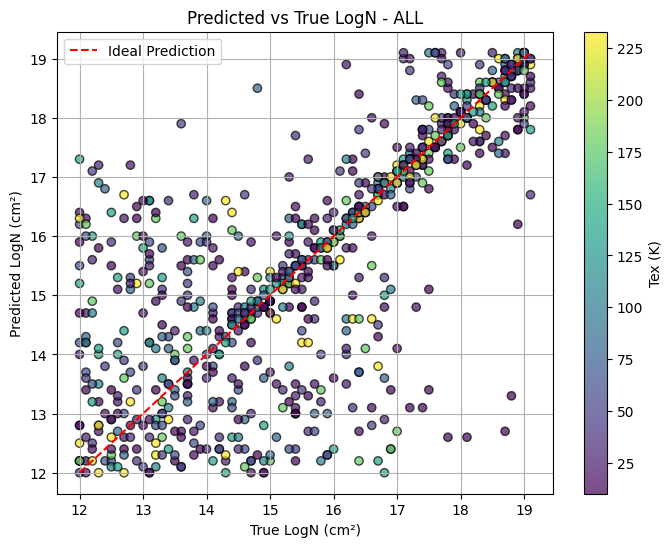

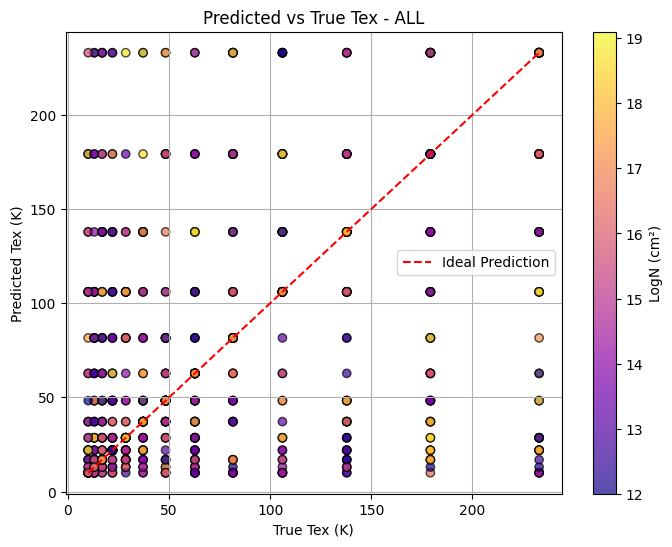

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


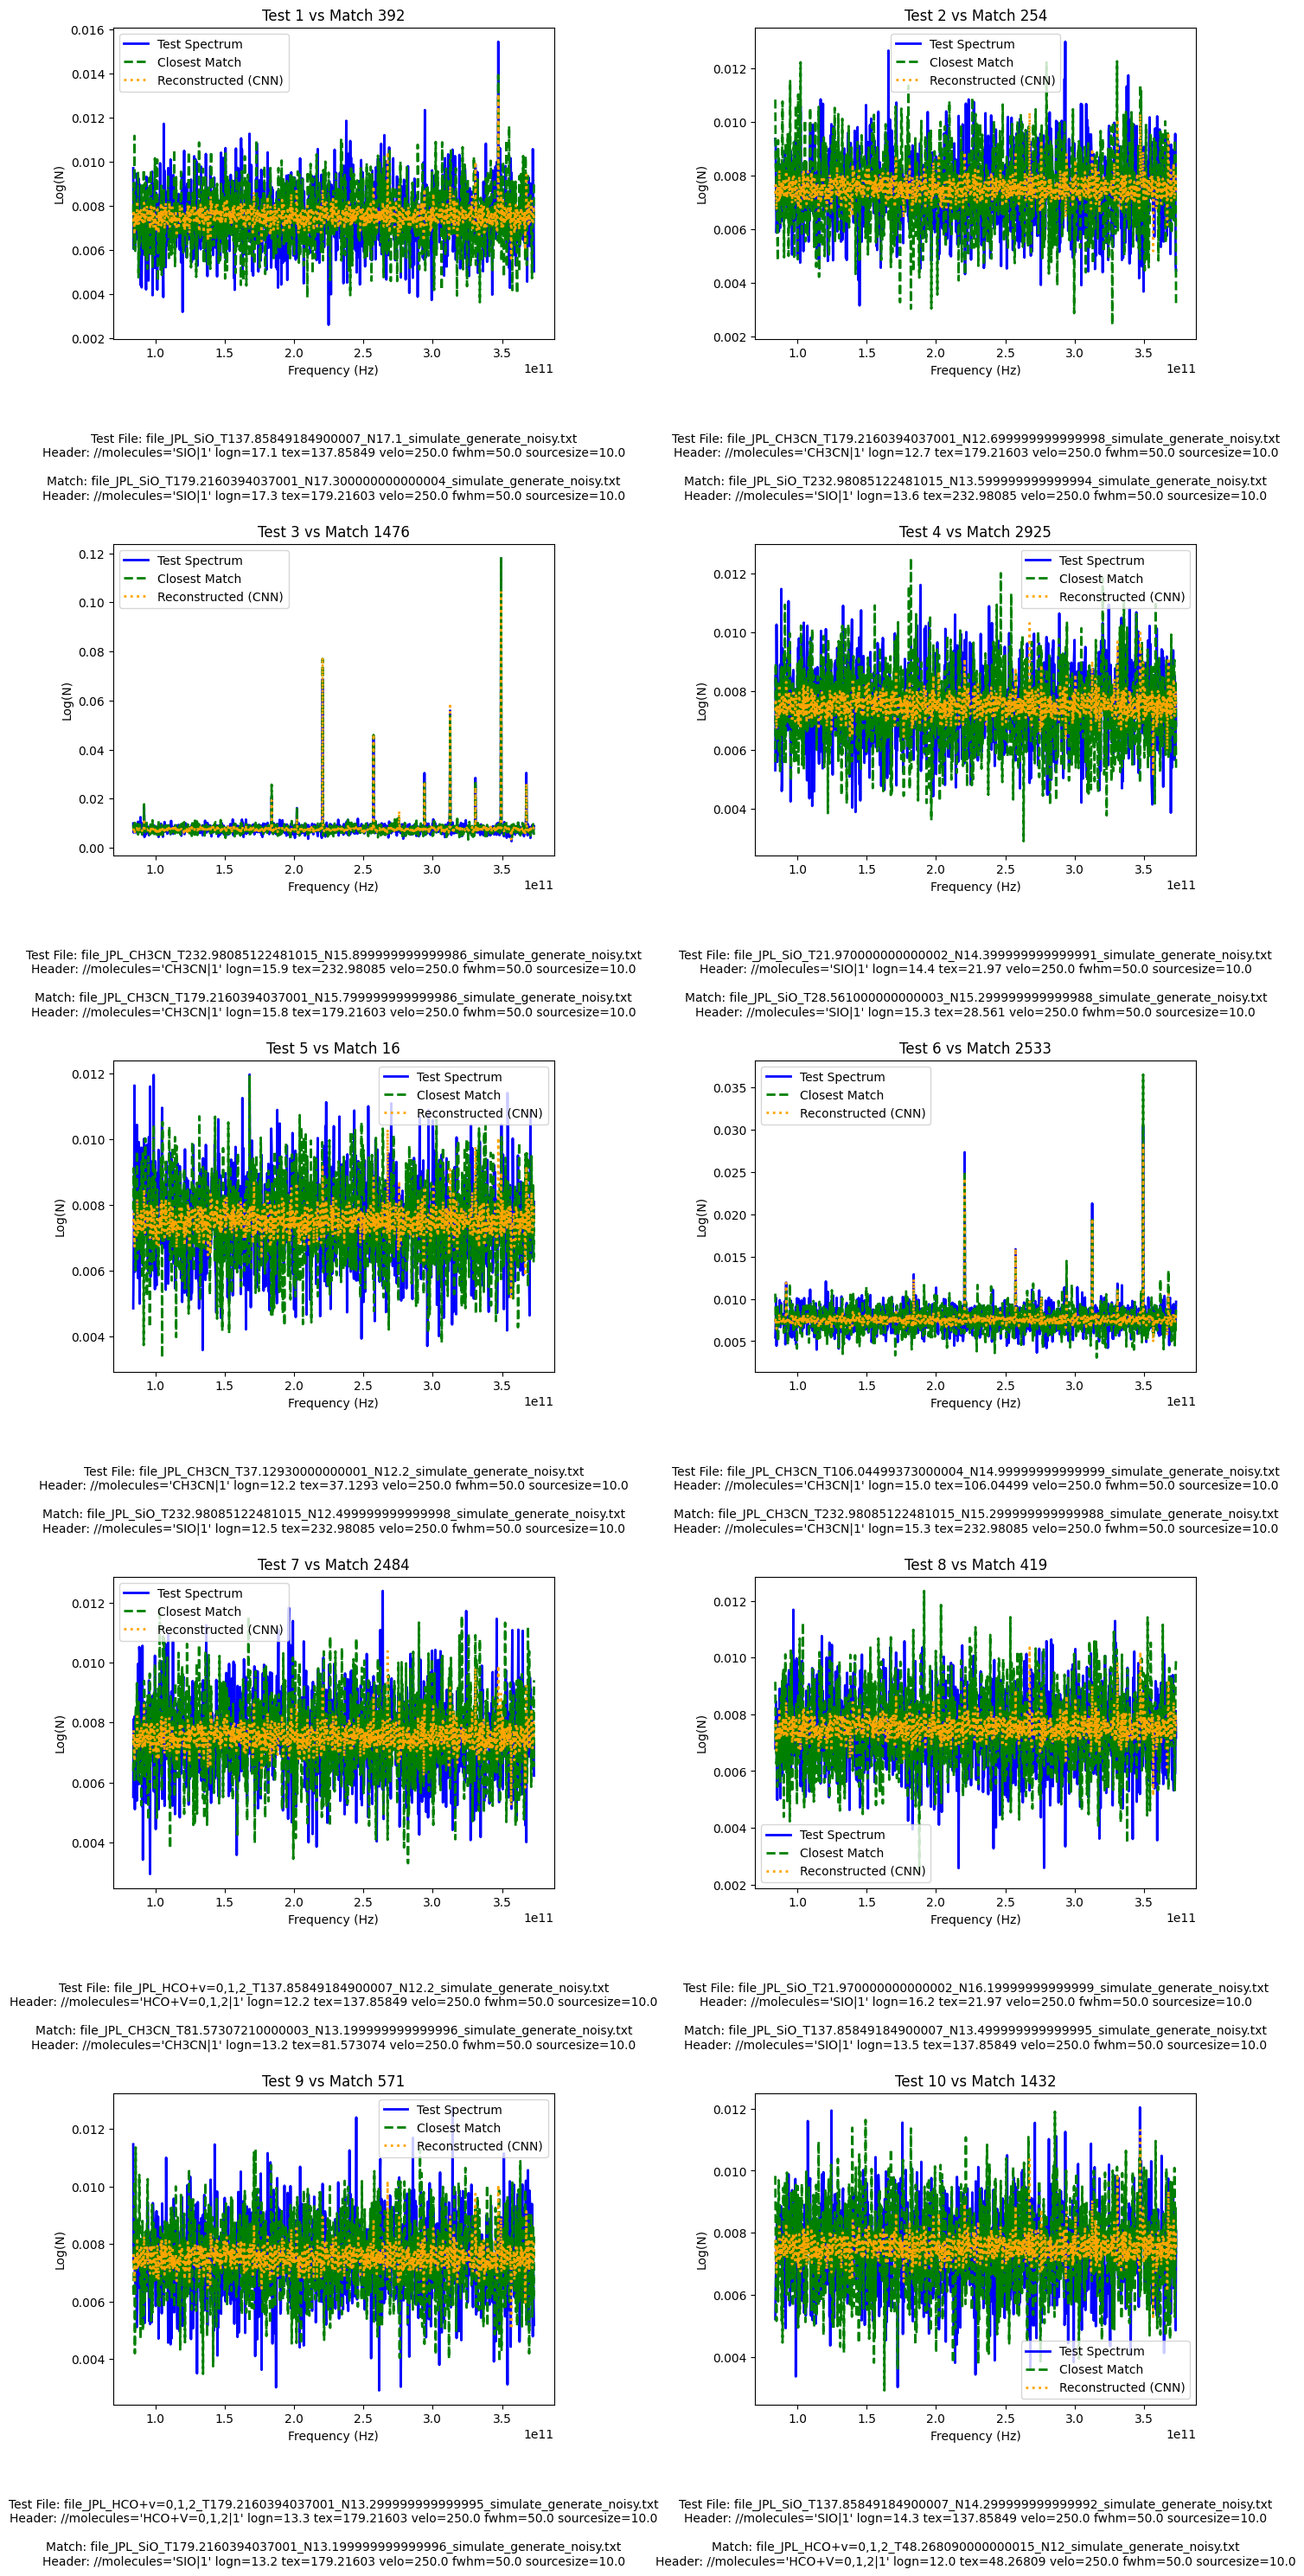

Classifying spectrum from C:\1. AI - ITACA\9. JupyterNotebook\_BK\example_4mols_AVER_...
Error processing the classification file C:\1. AI - ITACA\9. JupyterNotebook\_BK\example_4mols_AVER_: [WinError 267] El nombre del directorio no es válido: 'C:\\1. AI - ITACA\\9. JupyterNotebook\\_BK\\example_4mols_AVER_'
Plots saved to CNN_PERFORMANCE_LOGN_v5_with_classification.pdf


In [20]:
# 1. IMPORTING LIBRARIES
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
import tensorflow as tf
from tensorflow.keras import layers
import re
from matplotlib.backends.backend_pdf import PdfPages

# 2. FUNCTION TO LOAD AND PROCESS DATA
def load_data(folder, interp_points=30000):
    spectra, frequencies, headers, filenames_list, logn_values, tex_values = [], [], [], [], [], []
    
    for filename in os.listdir(folder):
        if "_simulate_generate_noisy" in filename:
        #if "_cleaned_simulate_generate" in filename:
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as file:
                lines = file.readlines()
                if len(lines) < 3:
                    continue
                
                header = lines[0].strip()
                logn_match = re.search(r'logn=([0-9]+\.?[0-9]*)', header)
                tex_match = re.search(r'tex=([0-9]+\.?[0-9]*)', header)
                
                if logn_match and tex_match:
                    logn_value = float(logn_match.group(1))
                    tex_value = float(tex_match.group(1))
                else:
                    continue
                
                data_lines = lines[2:]
                try:
                    data = np.array([list(map(float, line.split())) for line in data_lines])
                    freq, spec = data[:, 0], data[:, 1]
                    frequencies.append(freq)
                    spectra.append(spec)
                    headers.append(header)
                    filenames_list.append(filename)
                    logn_values.append(logn_value)
                    tex_values.append(tex_value)
                except ValueError:
                    print(f"Error converting data in: {filename}")
    
    if not spectra:
        raise ValueError("No valid data found in the folder.")
    
    min_freq, max_freq = min(map(np.min, frequencies)), max(map(np.max, frequencies))
    new_x = np.linspace(min_freq, max_freq, interp_points)
    interpolated_spectra = [np.interp(new_x, freq, spec) for freq, spec in zip(frequencies, spectra)]
    
    print(f"Data loaded successfully from {folder}. Data shape: {len(interpolated_spectra)}")
    return np.tile(new_x, (len(interpolated_spectra), 1)), np.array(interpolated_spectra), headers, filenames_list, np.array(logn_values), np.array(tex_values)

# 3. FUNCTION TO BUILD CNN MODEL
def build_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        layers.Conv1D(32, kernel_size=5, activation='relu', padding='same'),
        layers.Conv1D(64, kernel_size=5, activation='relu', padding='same'),
        layers.MaxPooling1D(2, padding='same') if input_shape[0] > 2 else layers.Activation('relu'),
        layers.Conv1D(128, kernel_size=5, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(input_shape[0], activation='linear')
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# 4. FUNCTION TO TRAIN AND EVALUATE CNN
def train_and_evaluate_cnn(model, train_data):
    model.fit(train_data, train_data, epochs=50, batch_size=32, validation_split=0.1)
    return model

# 5. FUNCTION TO PLOT LOGN PREDICTIONS
def plot_logn_vs_predicted(test_logn, train_logn, closest_matches, test_tex, database_folder, pdf):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(test_logn, train_logn[closest_matches], c=test_tex, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.colorbar(scatter, label='Tex (K)')
    plt.plot([min(test_logn), max(test_logn)], [min(test_logn), max(test_logn)], 'r--', label='Ideal Prediction')
    plt.xlabel("True LogN (cm²)")
    plt.ylabel("Predicted LogN (cm²)")
    plt.title(f"Predicted vs True LogN - {os.path.basename(database_folder)}")
    plt.legend()
    plt.grid()
    pdf.savefig()
    plt.show()
    plt.close()

# 6. FUNCTION TO PLOT TEX PREDICTIONS
def plot_tex_vs_predicted(test_tex, train_tex, closest_matches, test_logn, database_folder, pdf):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(test_tex, train_tex[closest_matches], c=test_logn, cmap='plasma', alpha=0.7, edgecolors='k')
    plt.colorbar(scatter, label='LogN (cm²)')
    plt.plot([min(test_tex), max(test_tex)], [min(test_tex), max(test_tex)], 'r--', label='Ideal Prediction')
    plt.xlabel("True Tex (K)")
    plt.ylabel("Predicted Tex (K)")
    plt.title(f"Predicted vs True Tex - {os.path.basename(database_folder)}")
    plt.legend()
    plt.grid()
    pdf.savefig()
    plt.show()
    plt.close()

# 7. FUNCTION TO PLOT SPECTRA
def plot_spectra(test_data, test_freq, train_data, train_freq, closest_matches, test_filenames, test_headers, train_filenames, train_headers, reconstructed_test, pdf):
    n_samples = min(10, len(test_data))
    indices = np.random.choice(len(test_data), n_samples, replace=False)
    
    plt.figure(figsize=(15, 30))
    for i, idx in enumerate(indices):
        best_match_idx = closest_matches[idx]
        plt.subplot(5, 2, i+1)
        plt.plot(test_freq[idx], test_data[idx], label='Test Spectrum', color='blue', linewidth=2)
        plt.plot(train_freq[best_match_idx], train_data[best_match_idx], label='Closest Match', linestyle='dashed', color='green', linewidth=2)
        plt.plot(test_freq[idx], reconstructed_test[idx], label='Reconstructed (CNN)', linestyle='dotted', color='orange', linewidth=2)
        plt.legend()
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Log(N)")
        plt.title(f"Test {i+1} vs Match {best_match_idx}")
        plt.text(0.5, -0.3, f"Test File: {test_filenames[idx]}\nHeader: {test_headers[idx]}\n\n" 
                 f"Match: {train_filenames[best_match_idx]}\nHeader: {train_headers[best_match_idx]}",
                 fontsize=10, ha='center', va='top', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    pdf.savefig()
    plt.show()
    plt.close()

directories = [
    r"C:\\1. AI - ITACA\\9. JupyterNotebook\\_BK\SYNTHETIC_SPECTRA_NOISE\\ALL"
]
# 8. MAIN SCRIPT TO PROCESS DATA, CLASSIFY AND GENERATE PLOTS
pdf_filename = "CNN_PERFORMANCE_LOGN_v5_with_classification.pdf"

# Path for the file to classify
classification_file = r"C:\1. AI - ITACA\9. JupyterNotebook\_BK\example_4mols_0.605"

with PdfPages(pdf_filename) as pdf:
    # Process directories first
    for database_folder in directories:
        try:
            frequencies, data, headers, filenames, logn_values, tex_values = load_data(database_folder, interp_points=1000)
            data = (data - np.min(data)) / (np.max(data) - np.min(data))

            train_data, test_data, train_freq, test_freq, train_headers, test_headers, train_filenames, test_filenames, train_logn, test_logn, train_tex, test_tex = train_test_split(
                data, frequencies, headers, filenames, logn_values, tex_values, test_size=0.2, random_state=42, shuffle=True
            )

            train_data, test_data = np.expand_dims(train_data, axis=-1), np.expand_dims(test_data, axis=-1)

            model = build_cnn_model((train_data.shape[1], 1))
            model = train_and_evaluate_cnn(model, train_data)

            encoded_test = model.predict(test_data)
            encoded_train = model.predict(train_data)

            closest_matches = np.argmin(euclidean_distances(encoded_test, encoded_train), axis=1)

            plot_logn_vs_predicted(test_logn, train_logn, closest_matches, test_tex, database_folder, pdf)
            plot_tex_vs_predicted(test_tex, train_tex, closest_matches, test_logn, database_folder, pdf)

            reconstructed_test = model.predict(test_data)
            plot_spectra(test_data, test_freq, train_data, train_freq, closest_matches, test_filenames, test_headers, train_filenames, train_headers, reconstructed_test, pdf)

        except Exception as e:
            print(f"Error processing {database_folder}: {e}")

    # Now classify the specific file 'example_4mols_AVER_'
    try:
        # Check if the file exists and is not a directory
        if os.path.exists(classification_file) and not os.path.isdir(classification_file):
            print(f"Classifying spectrum from {classification_file}...")
            # Load data as if it's a valid file even without extension
            classification_freq, classification_data, classification_headers, classification_filenames, classification_logn, classification_tex = load_data(classification_file, interp_points=1000)
            classification_data = (classification_data - np.min(classification_data)) / (np.max(classification_data) - np.min(classification_data))

            classification_data_expanded = np.expand_dims(classification_data, axis=-1)
            encoded_classification = model.predict(classification_data_expanded)

            closest_match_classification = np.argmin(euclidean_distances(encoded_classification, encoded_train), axis=1)

            plt.figure(figsize=(15, 6))
            for idx in range(min(5, len(classification_data))):
                best_match_idx = closest_match_classification[idx]
                plt.subplot(2, 3, idx + 1)
                plt.plot(classification_freq[idx], classification_data[idx], label='Original Spectrum', color='blue', linewidth=2)
                plt.plot(train_freq[best_match_idx], train_data[best_match_idx], label='Closest Match', linestyle='dashed', color='green', linewidth=2)
                plt.plot(classification_freq[idx], reconstructed_test[idx], label='Reconstructed (CNN)', linestyle='dotted', color='orange', linewidth=2)
                plt.legend()
                plt.xlabel("Frequency (Hz)")
                plt.ylabel("Log(N)")
                plt.title(f"Test {idx+1} vs Match {best_match_idx}")
                plt.text(0.5, -0.3, f"Test File: {classification_filenames[idx]}\nHeader: {classification_headers[idx]}\n\n"
                         f"Match: {train_filenames[best_match_idx]}\nHeader: {train_headers[best_match_idx]}",
                         fontsize=10, ha='center', va='top', transform=plt.gca().transAxes)

            plt.tight_layout()
            pdf.savefig()
            plt.show()
            plt.close()

        else:
            print(f"Error: {classification_file} is not a valid file.")
    except Exception as e:
        print(f"Error processing the classification file {classification_file}: {e}")

print(f"Plots saved to {pdf_filename}")



Input 